# Using Scikit-Learn for Machine Learning

Scikit-Learn is a python library for machine learning. Some things you can do with [scikit-learn](http://scikit-learn.org/stable/)
<img src="scikit-learn.png" width="800">

In this demo we'll see:
1. How to load data from different sources.
1. How to do apply some data preprocessing using [scikit-learn](http://scikit-learn.org/stable/) and [Pandas](https://pandas.pydata.org/), which is a collection of python tools for data analysis.
2. How to use scikit-learn for cross-validation
2. How to run all the algorithms we've seen in class (decision tree, perceptron, SVM) with scikit-learn


*Note*: The tutorials here are not an exhaustive representation of what we can do with these tools. They are meant to give you an starting point.

## Loading in the Data

### Pre-Installed Datsets

Scikit learn has some [pre-installed datasets](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets). We're going to check out the "Iris" dataset. More information on the Iris dataset is available here: 
1. [UCI Machine learning Repository](https://archive.ics.uci.edu/ml/datasets/iris)
2. [Wikipedia article about the dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set)

Let us first load the dataset. (To run the any of the code cells, you click on it and press Shift+Enter.)

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

Let us quickly see what the dataset looks like.

In [3]:
print(iris.keys())
#You can check out the description of the dataset using the following command
#print(iris.DESCR)

n_samples, n_features = iris.data.shape
print('Number of samples:', n_samples)
print('Number of features:', n_features)
# the sepal length, sepal width, petal length and petal width of the first sample (first flower)
print('Features:', iris.feature_names)
print(iris.data[0])

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
Number of samples: 150
Number of features: 4
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[ 5.1  3.5  1.4  0.2]


In [4]:
print("Shape of the features:", iris.data.shape)
print("Shape of the labels:", iris.target.shape)

Shape of the features: (150, 4)
Shape of the labels: (150,)


In [5]:
# all of the labels
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Let's create a scatter plot of the data to get an idea of how it looks. For this we'll use python library, Matplotlib.

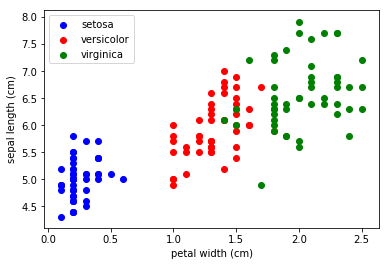

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt


# A scatter plot of the 3rd feature against the 0th feature.
x_index = 3
y_index = 0

colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.scatter(iris.data[iris.target==label, x_index], 
                iris.data[iris.target==label, y_index],
                label=iris.target_names[label],
                c=color)

plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.legend(loc='upper left')
plt.show()

### Loading your own dataset

There are different places where you can find data sets like Kaggle, [the UCI repository](https://archive.ics.uci.edu/ml/datasets.html), etc.

Here, we'll be using the Titanic Passenger Survival Data Set. The description can be found here: https://www.kaggle.com/c/titanic/data. Briefly, the goal is to predict whether a passenger survived the Titanic disaster or not.

We have already included the dataset in this git repository in the file `titanic.csv`. Let us load it from there.

In [7]:
import os
import pandas as pd

#loading the datset from .csv file
titanic = pd.read_csv(os.path.join('data', 'titanic.csv'))

#print columns in the table
print("Columns in titanic.csv: " + str(list(titanic.columns)))

#labels are stored in column named 'survived'. Let us save it in a variable called labels.
labels = titanic.survived.values

#fetch the columns that we'll be using for our models
data = titanic[['pclass', 'sex', 'sibsp', 'parch', 'embarked']]
print("Data shape (rows, columns) =  ", data.shape)


Columns in titanic.csv: ['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest']
Data shape (rows, columns) =   (1309, 5)


Before we start with the machine learning, let's see the survival rate based on the gender of the passenger.

0    682
1    161
Name: survived, dtype: int64
0    127
1    339
Name: survived, dtype: int64


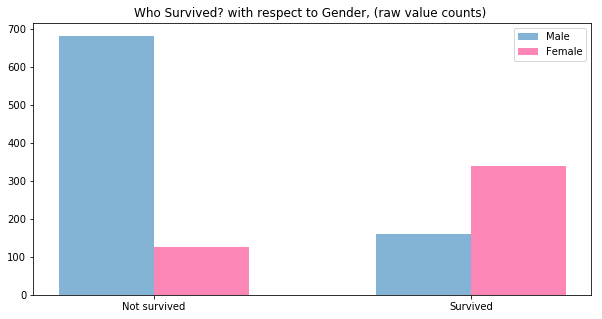

In [8]:
# First, split the data by male/female.
df_male = titanic.survived[titanic.sex == 'male'].value_counts().sort_index()
df_female = titanic.survived[titanic.sex == 'female'].value_counts().sort_index()

print(df_male)
print(df_female)

# Use matplotlib again for plotting 

fig, ax = plt.subplots(figsize=(10,5))
label_values = [0,1]
plt.bar([l - 0.15 for l in label_values], df_male, 0.3, label = 'Male', alpha=0.55)
plt.bar([l + 0.15 for l in label_values], df_female, 0.3,color='#FA2379', label = 'Female', alpha=0.55)
ax.set_xticks([0,1])
ax.set_xticklabels(['Not survived', 'Survived'])
plt.title("Who Survived? with respect to Gender, (raw value counts) "); plt.legend(loc='best')


## Scikit-learn with real world data: Preprocessing

We will look at some techniques for transforming the features now.

### Binning
Binning is a technique which is used to convert continuous values to discrete values for the ease of classification.


In [ ]:
# let's have a look at ages and fares
print('age')
print(titanic['age'].head(5))
print()
print('fare')
print(titanic['fare'].head(5))
print()

#lets look at min, max, median and mean for age and fare. This will help us in deciding the bins
print('property | Age | Fare')
print('min', titanic['age'].min(), titanic['fare'].min())
print('max', titanic['age'].max(), titanic['fare'].max())
print('median', titanic['age'].median(), titanic['fare'].median())
print('mean', titanic['age'].mean(), titanic['fare'].mean())
data.shape

In [ ]:
#create bins for age and fare
bins_age = [0, 25, 60,  100]
bins_fare = [0, 25, 100, 1000]

age_groups = ['young', 'adult', 'senior']
fare_groups = ['low', 'medium', 'high']

data.loc[:, 'age'] = pd.cut(titanic.loc[:, 'age'], bins_age, labels=age_groups)
data.loc[:, 'fare'] = pd.cut(titanic.loc[:, 'fare'], bins_fare, labels=fare_groups)

#remove original columns
# del data['age']
# del data['fare']

data.head(5)

### Converting Categorical values to Numerical values

Here we will be converting categorical values like Male/Female to numerical values like 1/2 for easier processing.

Here, we'll be using 2 different techniques:
- LabelEncoder: This is used when none of the values for this column are missing.
- factorize: This is used when there are missing values. The missing value is assigned the value of -1.

In [ ]:
from sklearn.preprocessing import LabelEncoder
import warnings; warnings.simplefilter('ignore')

#let's check the values before we change categorical values to numbers.
print(data.head(5))

le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])

#select only those columns that are categorical
for column in data.select_dtypes(include=['object', 'category']).columns:
    data[column] = data[column].factorize()[0]

#after processing
data.head(5)

### Handling missing values

There are different ways to handle missing values. Here we're using `fillna()` from pandas since we had categorical values. You could also use `Imputer` from scikit-learn to fill with mean, median etc. See [the documentation](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) to learn more about it.

In either case, we need to replace -1 with `np.nan` (i.e. not-a-number). This is needed because `factorize()` from above encodes missing values as -1.

Not that, `Imputer` returns an `ndarray1`, whereas `fillna` gives us a `dataframe`.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
import numpy as np 

data = data.replace(-1, np.nan)

#try this
# imp = Imputer(strategy="median") # can supply different strategies
# imp.fit(data)
# data = imp.transform(data)

data = data.fillna(data.median()) # can try with sum, mean etc.
data.head(5)

### Converting Categorical Values to Boolean Values (Binary Values)
We will be using one-hot-encoding to convert categorical features to binary features.

#### What is one-hot-encoding?

When a column has categorical values, it is hard for the machine learning algorithm to train  upon. To make it more suitable for the ML algorithms, we convert each category for that column to a boolean column. Only one of the columns can take a value of one for a single sample. Hence, it is called as one hot encoding. 

(eg) Suppose you have ‘flower’ feature which can take values ‘daffodil’, ‘lily’, and ‘rose’. One hot encoding converts ‘flower’ feature to three features, ‘is_daffodil’, ‘is_lily’, and ‘is_rose’ which all are binary.

We will be using pandas' get_dummies() function which is equivalent to scikit-learn [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder).

Refer: https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

In [ ]:
# to convert all categorical columns to boolean columns
# data = pd.get_dummies(data)

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc_data = enc.fit_transform(data).toarray()

# you can also select the columns to convert. I don't know why you would do that though!
# data = pd.get_dummies(data, columns=[ 'sex', 'embarked', 'age', 'fare'])
print('columns:', enc_data.shape[1])
print('rows:', enc_data.shape[0])

### Scaling features 

In [ ]:
from sklearn import preprocessing

processed_age_data = preprocessing.scale(data['age'])

print("The mean of the original age data is", data['age'].mean(axis=0))
print("The std  of the original age data is", data['age'].std(axis=0))
print()

print("The mean of the transformed age data is", processed_age_data.mean(axis=0))
print("The std  of the transformed age data is", processed_age_data.std(axis=0))


## Creating a Test-Train Split
Here we'll create train and test splits to train and test our algorithm.

We'll keep two sets: 
1. without OneHotEncoding (we will call this setting A) and 
2. with OneHotEncoding (setting B).

We will compare the results of the two for each algorithm.

In [ ]:
# splits without encoded values. We will call this setting 'A'
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state=0)

# splits with encoded values. We will call this setting 'B'
enc_train_data, enc_test_data, enc_train_labels, enc_test_labels = train_test_split(enc_data, labels, random_state=0)

## Baselines

### Randomly predicting a label

Here we'll see a classifier that predicts labels at random.

In [ ]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier("uniform")
clf.fit(train_data, train_labels)
print("Prediction accuracy:", clf.score(test_data, test_labels))

As expected, the accuracy from chance is about 50%. Let's try a better classifier

### Most Common Label

Scikit learn calls this a "dummy" classifier. Easy "baseline" for learning. Just labels all the instances with the most common/frequent label.

In [ ]:
clf = DummyClassifier('most_frequent')
clf.fit(train_data, train_labels)
print("Prediction accuracy:", clf.score(test_data, test_labels))

## Algorithms we have seen in class

### SVM

The support vector machine is called `LinearSVC` in scikit learn. (SVC stands for Support Vector Classification). You can read more about it [here](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC).

First, let us import `LinearSVC` and create the classifier.

In [ ]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=4000)


Now, let us try setting A.

In [ ]:

#train on setting A
clf.fit(train_data, train_labels)

# Test on setting A
print("Weight vector: " + str(clf.coef_))
print("Bias: " + str(clf.intercept_))
print()
print("Prediction accuracy:", clf.score(test_data, test_labels))
print()


Next, let us see how well setting B does.

In [ ]:

#train on setting B
clf.fit(enc_train_data, enc_train_labels)

# Test on setting B
print("Weight vector: " + str(clf.coef_))
print("Bias: " + str(clf.intercept_))
print()
print("Prediction accuracy:", clf.score(enc_test_data, enc_test_labels))

#### Cross Validating SVM

We will be cross validating for parameter C. As you might remember from class, 'C' is the penalty parameter of the error formula. 

[Documentation](http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC


# Set the parameters by cross-validation
tuned_parameters = [{'C': [1e-3, 1e-2, 1e-2, 1, 10, 100, 1000, 5000]}]

print("# Tuning hyper-parameters for accuracy")
print()

clf = GridSearchCV(LinearSVC(), tuned_parameters, cv=5, scoring='accuracy')
clf.fit(train_data, train_labels)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

#train and test by using best parameters.
clf = LinearSVC(random_state=4000, C=clf.best_params_['C'])
clf.fit(train_data, train_labels)

print("Weights: " + str(clf.coef_))
print("Bias: " + str(clf.intercept_))
print()
print("Prediction accuracy:", clf.score(test_data, test_labels))

### Perceptron

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import Perceptron

clf = Perceptron(random_state=2000)

#train and test on split A
clf.fit(train_data, train_labels)

print("Setting A")
print("Perceptron weights for setting A: " + str(clf.coef_))
print("Perceptron bias for setting A: " + str(clf.intercept_))
print()
print("Prediction accuracy for setting A:", clf.score(test_data, test_labels))
print("\n\n")

#train and test on split B
clf.fit(enc_train_data, enc_train_labels)
print("Setting B")

print("Perceptron weights for setting B: " + str(clf.coef_))
print("Perceptron bias for setting B: " + str(clf.intercept_))
print()
print("Prediction accuracy:", clf.score(enc_test_data, enc_test_labels))


### Decision Tree


In [ ]:
#http://scikit-learn.org/stable/modules/tree.html
#for visualization

import graphviz 
from sklearn import tree

#for windows, uncomment the following and replace with path of you local Graphviz.38/bin. Include path of bin and not python lib
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='gini')
clf.fit(train_data, train_labels)
DecisionTreeClassifier()

print("Accuracy", clf.score(test_data, test_labels))
print("The depth of this tree is", clf.tree_.max_depth)

graph = graphviz.Source(tree.export_graphviz(clf, out_file=None)) 
graph.render('graphs/dt_gini')

clf.fit(enc_train_data, enc_train_labels)
DecisionTreeClassifier()

print("Accuracy", clf.score(enc_test_data, enc_test_labels))
print("The depth of this tree is", clf.tree_.max_depth)


graph = graphviz.Source(tree.export_graphviz(clf, out_file=None)) 
graph.render('graphs/dt_gini_enc')

We can try using a different criterion to build the tree.

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(train_data, train_labels)
DecisionTreeClassifier()

print("Accuracy", clf.score(test_data, test_labels))
print("The depth of this tree is", clf.tree_.max_depth)

graph = graphviz.Source(tree.export_graphviz(clf, out_file=None)) 
graph.render('graphs/dt_entropy')

clf.fit(enc_train_data, enc_train_labels)
DecisionTreeClassifier()

print("Accuracy", clf.score(enc_test_data, enc_test_labels))
print("The depth of this tree is", clf.tree_.max_depth)


graph = graphviz.Source(tree.export_graphviz(clf, out_file=None)) 
graph.render('graphs/dt_entropy_enc')


Let's try limiting the depth and visualize our tree...

http://scikit-learn.org/stable/modules/tree.html

In [ ]:
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(train_data, train_labels)
DecisionTreeClassifier()

print("Accuracy", clf.score(test_data, test_labels))
print("The depth of this tree is", clf.tree_.max_depth)

graph = graphviz.Source(tree.export_graphviz(clf, out_file=None)) 
graph.render('graphs/dt_gini_limit')
graph

In [ ]:
# clf.tree_.__getstate__()
clf.fit(enc_train_data, enc_train_labels)
DecisionTreeClassifier()

print("Accuracy", clf.score(enc_test_data, enc_test_labels))
print("The depth of this tree is", clf.tree_.max_depth)

graph = graphviz.Source(tree.export_graphviz(clf, out_file=None)) 
graph.render('graphs/dt_gini_limit_enc')
graph

### Random Forest

Here we'll be training a random forest. Try modifying the parameters and see how it affects the accuracy

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=6, random_state=0, n_estimators=35, criterion='gini')
clf.fit(train_data, train_labels)
print(clf.feature_importances_)
print()
print("Prediction accuracy:", clf.score(test_data, test_labels))

## Other algorithms

- Logistic Regression
- Naive Bayes
- Adaboost
- K Nearest Neighbors
- Multiclass classifiers
- SVM with Kernels

### Logistic Regression

Try you hands at logistic regression.

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

#train and test on setting A
clf.fit(train_data, train_labels)
print('Prediction Accuracy:', clf.score(test_data, test_labels))

#train and test on setting B
clf.fit(enc_train_data, enc_train_labels)
print('Prediction Accuracy:', clf.score(enc_test_data, enc_test_labels))

### Adaboost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(criterion='entropy'), n_estimators=75)

#train and test on split A
clf.fit(train_data, train_labels)
print('Prediction Accuracy:', clf.score(test_data, test_labels))

#train and test on split B
clf.fit(enc_train_data, enc_train_labels)
print('Prediction Accuracy:', clf.score(enc_test_data, enc_test_labels))

### K Nearest classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


clf = KNeighborsClassifier(n_neighbors=10)

#train and test on split A
clf.fit(train_data, train_labels)
print('Prediction Accuracy:', clf.score(test_data, test_labels))

#train and test on split B
clf.fit(enc_train_data, enc_train_labels)
print('Prediction Accuracy:', clf.score(enc_test_data, enc_test_labels))

### Multi-class classification

We come back to iris dataset and use some techniques of multi-class classification.

In [ ]:
iris_train_data, iris_test_data, iris_train_labels, iris_test_labels = train_test_split(iris.data, iris.target, random_state=0)

In [ ]:
#one-vs-all
clf = LinearSVC(random_state=4000, multi_class='ovr')

clf.fit(iris_train_data, iris_train_labels)

print("Prediction accuracy:", clf.score(iris_test_data, iris_test_labels))

In [ ]:
#one-vs-one
from sklearn.svm import SVC

clf = SVC(random_state=4000)

clf.fit(iris_train_data, iris_train_labels)

print("Prediction accuracy:", clf.score(iris_test_data, iris_test_labels))

In [ ]:
#multi-class
clf = LinearSVC(random_state=4000, multi_class='crammer_singer')

clf.fit(iris_train_data, iris_train_labels)

print("Prediction accuracy:", clf.score(iris_test_data, iris_test_labels))

In [ ]:
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(iris_train_data, iris_train_labels)
DecisionTreeClassifier()

print("Accuracy", clf.score(iris_test_data, iris_test_labels))
print("The depth of this tree is", clf.tree_.max_depth)


graph = graphviz.Source(tree.export_graphviz(clf, out_file=None)) 
graph

## Links!
- Scikit learn official page: http://scikit-learn.org/stable/index.html

- Pandas official page: http://pandas.pydata.org/pandas-docs/stable/index.html

- lots of scikit demos: https://github.com/amueller/scipy-2016-sklearn/tree/master/notebooks

- svm documentation: http://scikit-learn.org/stable/modules/svm.html

- decision tree documentation: http://scikit-learn.org/stable/modules/tree.html

- perceptron documentation: http://scikit-learn.org/stable/modules/linear_model.html#perceptron

- graphing trees: http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

- cross-validation parameter search documentation: http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py
- Parts of this tutorial have been based on this tutorial: https://github.com/amueller/scipy-2016-sklearn/blob/master/notebooks/10%20Case%20Study%20-%20Titanic%20Survival.ipynb